<a href="https://colab.research.google.com/github/SaifEleslamElgalaly/food-101-classification/blob/main/Proposed_Machine_Learning_Models_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

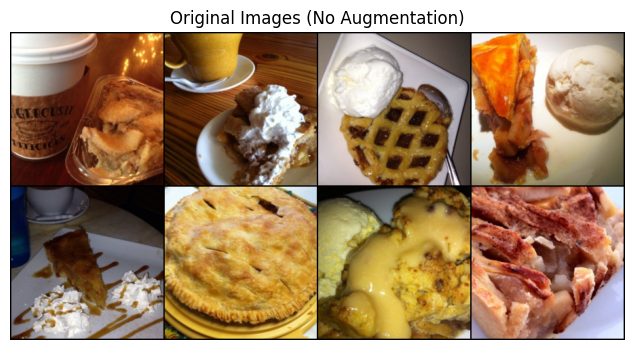

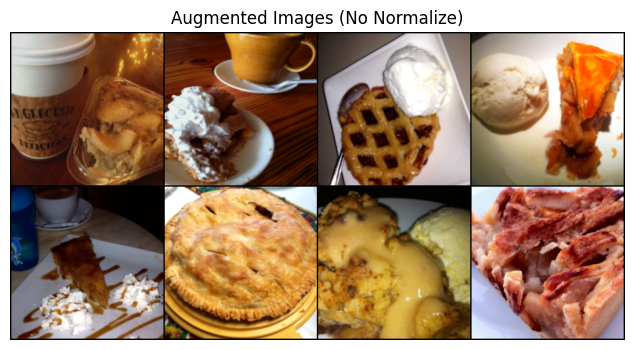

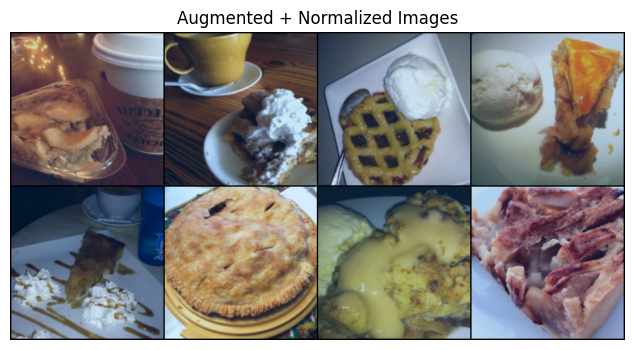

In [ ]:
from torchvision import transforms as T
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision

# ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©
data_path = '/kaggle/working/food-101-split/train'
mean = [0.5498, 0.4451, 0.3431]
std = [0.2638, 0.2641, 0.2688]

# 1. Transform ÿ®ÿØŸàŸÜ ÿ£Ÿä ÿ™ÿπÿØŸäŸÑ (ŸÑŸÑÿµŸàÿ± ÿßŸÑÿ£ÿµŸÑŸäÿ©)
base_transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor()
])

# 2. Augmentation ŸÅŸÇÿ∑ (ÿ®ÿØŸàŸÜ Normalize)
augmented_transform = T.Compose([
    T.Resize(256),
     T.RandomResizedCrop(224, scale=(0.8,1.0)),
    T.RandomHorizontalFlip(p=0.5),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.02),
    T.ToTensor()
])

# 3. Augmentation + Normalize
augmented_norm_transform = T.Compose([
    T.Resize(256),
    T.RandomResizedCrop(224, scale=(0.8,1.0)),
    T.RandomHorizontalFlip(p=0.5),
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.02),
    T.ToTensor(),
    T.Normalize(mean=mean, std=std)
])

# Loaders
base_ds = ImageFolder(data_path, transform=base_transform)
aug_ds  = ImageFolder(data_path, transform=augmented_transform)
aug_norm_ds = ImageFolder(data_path, transform=augmented_norm_transform)

# ÿßÿ≥ÿ™ÿÆÿØŸÖ ŸÜŸÅÿ≥ ÿßŸÑÿ™ÿ±ÿ™Ÿäÿ® ŸÅŸä ŸÉŸÑ ŸÖÿ±Ÿëÿ© (batch ÿ´ÿßÿ®ÿ™)
base_loader = DataLoader(base_ds, batch_size=8, shuffle=False)
aug_loader  = DataLoader(aug_ds, batch_size=8, shuffle=False)
aug_norm_loader = DataLoader(aug_norm_ds, batch_size=8, shuffle=False)

# ÿ£ÿÆÿ∞ ŸÜŸÅÿ≥ ÿßŸÑÿµŸàÿ± ŸÖŸÜ ŸÉŸÑ loader
base_imgs, _      = next(iter(base_loader))
aug_imgs, _       = next(iter(aug_loader))
aug_norm_imgs, _  = next(iter(aug_norm_loader))

# Helper ŸÑÿπÿ±ÿ∂ ÿßŸÑÿµŸàÿ±
def show_images(tensor_batch, title, normalize=False):
    grid = torchvision.utils.make_grid(tensor_batch, nrow=4, normalize=normalize)
    plt.figure(figsize=(8,4))
    plt.imshow(grid.permute(1,2,0))
    plt.axis('off')
    plt.title(title)
    plt.show()

# ÿßŸÑÿπÿ±ÿ∂
show_images(base_imgs, "Original Images (No Augmentation)")
show_images(aug_imgs, "Augmented Images (No Normalize)")
show_images(aug_norm_imgs, "Augmented + Normalized Images", normalize=True)

Ÿ¢) Normalization & Transformation
2.1 ÿ≠ÿ≥ÿßÿ® Normalization ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ÿßŸÑÿ®ŸÉÿ≥ŸÑ
ÿπŸÑÿ¥ÿßŸÜ ÿ™ÿ∂ŸÖŸÜ ÿ•ŸÜŸë ÿßŸÑŸÇŸÜŸàÿßÿ™ ÿßŸÑŸÑŸàŸÜŸäÿ© (R,G,B) ŸÉŸÑŸáÿß ÿπŸÑŸâ ŸÜŸÅÿ≥ ÿßŸÑŸÖŸÇŸäÿßÿ≥ ŸàŸäÿ≥ÿ±Ÿëÿπ convergenceÿå ŸÜÿ≠ÿ≥ÿ® mean Ÿà std ŸÑŸÉŸÑ ŸÇŸÜÿßÿ© ÿπŸÑŸâ ÿ®ŸäÿßŸÜÿßÿ™ ÿßŸÑŸÄ train ÿßŸÑŸÜÿ∏ŸäŸÅÿ©:

2.2 ÿ™ÿ≠ÿØŸäÿ´ ÿßŸÑŸÄ Transforms ÿ®ŸÄŸÄ Normalize

2.3 (ÿßÿÆÿ™Ÿäÿßÿ±Ÿä) Normalize ŸÑŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿ±ŸÇŸÖŸäÿ©
ŸÑŸà ŸÉŸÜÿ™ Ÿáÿ™ÿ≥ÿ™ÿÆÿØŸÖ brightness_mean, contrast_mean, sharpness_mean ŸÉŸÖŸäÿ≤ÿßÿ™ ÿ•ÿ∂ÿßŸÅŸäÿ© ÿ®ÿ¨ÿßŸÜÿ® ÿßŸÑŸÄ CNNÿå ÿ∑ŸàŸëÿ®ŸáŸÖ ÿ®ŸÄ StandardScaler:

python
Copy
Edit


Ÿ°) imports Ÿàÿ™ÿ≠ÿ∂Ÿäÿ± ÿßŸÑÿ´Ÿàÿßÿ®ÿ™

------------------------------------------------------------------------

# Preprocessing

# Proposed Machine Learning Models

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from tqdm import tqdm
from glob import glob

# ÿ•ÿπÿØÿßÿØ ÿßŸÑŸÖÿ¨ŸÑÿØ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿä ŸÑŸÑÿµŸàÿ±
image_root = "/kaggle/working/food-101-split/train"
image_paths = glob(os.path.join(image_root, "*", "*.jpg"))

# ÿ™ŸáŸäÿ¶ÿ© ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
data = []

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑŸÖŸäÿ≤ÿßÿ™ ÿßŸÑÿ™ŸÇŸÑŸäÿØŸäÿ©: HOG + Color
for path in tqdm(image_paths, desc="Extracting Features"):
    # ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿµŸàÿ±ÿ©
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128, 128))  # HOG Ÿäÿ™ÿ∑ŸÑÿ® ÿ≠ÿ¨ŸÖ ÿ´ÿßÿ®ÿ™

    # ---- Color Features ----
    R_mean, G_mean, B_mean = img_resized[:, :, 0].mean(), img_resized[:, :, 1].mean(), img_resized[:, :, 2].mean()
    R_std, G_std, B_std = img_resized[:, :, 0].std(), img_resized[:, :, 1].std(), img_resized[:, :, 2].std()

    # ---- HOG Features ----
    gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
    hog_features = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)

    # ÿ™ÿ≠ÿØŸäÿØ ÿßŸÑŸÉŸÑÿßÿ≥ ŸÖŸÜ ÿßÿ≥ŸÖ ÿßŸÑŸÖÿ¨ŸÑÿØ
    label = os.path.basename(os.path.dirname(path))

    # ÿ¨ŸÖÿπ ÿßŸÑŸÉŸÑ ŸÅŸä ÿµŸÅ Ÿàÿßÿ≠ÿØ
    row = [path, label, R_mean, G_mean, B_mean, R_std, G_std, B_std] + list(hog_features)
    data.append(row)

# ÿ™ÿ≠ŸàŸäŸÑ ÿ•ŸÑŸâ DataFrame
hog_feature_names = [f'hog_{i}' for i in range(len(hog_features))]
columns = ['image_path', 'label', 'R_mean', 'G_mean', 'B_mean', 'R_std', 'G_std', 'B_std'] + hog_feature_names
df = pd.DataFrame(data, columns=columns)

# ÿ≠ŸÅÿ∏ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨
output_path = "/kaggle/working/traditional_features.csv"
df.to_csv(output_path, index=False)

#import ace_tools as tools; tools.display_dataframe_to_user(name="Traditional Features Extracted", dataframe=df)


Extracting Features: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8174/8174 [01:25<00:00, 96.00it/s] 


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

df = pd.read_csv("/kaggle/working/traditional_features.csv")
X = df.drop(columns=["image_path", "label"])
y = df["label"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=f_classif, k=300)
X_selected = selector.fit_transform(X_scaled, y_encoded)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_selected)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

np.save("/kaggle/working/X_train_traditional.npy", X_train)
np.save("/kaggle/working/X_test_traditional.npy", X_test)
np.save("/kaggle/working/y_train_traditional.npy", y_train)
np.save("/kaggle/working/y_test_traditional.npy", y_test)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train = np.load("/kaggle/working/X_train_traditional.npy")
X_test = np.load("/kaggle/working/X_test_traditional.npy")
y_train = np.load("/kaggle/working/y_train_traditional.npy")
y_test = np.load("/kaggle/working/y_test_traditional.npy")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("üìä KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("‚úÖ KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


üìä KNN Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.24      0.13       111
           1       0.13      0.30      0.18       111
           2       0.12      0.21      0.15       109
           3       0.15      0.16      0.15       108
           4       0.13      0.11      0.12       107
           5       0.19      0.06      0.09       109
           6       0.15      0.11      0.13       110
           7       0.14      0.06      0.08       107
           8       0.12      0.22      0.15       107
           9       0.25      0.18      0.21       108
          10       0.06      0.02      0.03       110
          11       0.12      0.10      0.11       110
          12       0.12      0.05      0.06       111
          13       0.08      0.03      0.04       108
          14       0.19      0.05      0.07       109

    accuracy                           0.13      1635
   macro avg       0.14      0.13      0.11     

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("üìä Na√Øve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("‚úÖ Na√Øve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


üìä Na√Øve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.12      0.12       111
           1       0.17      0.20      0.18       111
           2       0.16      0.16      0.16       109
           3       0.20      0.19      0.19       108
           4       0.14      0.15      0.15       107
           5       0.18      0.23      0.20       109
           6       0.14      0.08      0.10       110
           7       0.13      0.12      0.12       107
           8       0.24      0.50      0.33       107
           9       0.26      0.30      0.28       108
          10       0.11      0.07      0.09       110
          11       0.23      0.20      0.21       110
          12       0.13      0.14      0.13       111
          13       0.20      0.16      0.18       108
          14       0.10      0.06      0.08       109

    accuracy                           0.18      1635
   macro avg       0.17      0.18      

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_resnet = pd.read_csv("/kaggle/working/resnet50_features.csv")
X = df_resnet.drop(columns=["label", "image_path"])
y = df_resnet["label"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=f_classif, k=500)
X_selected = selector.fit_transform(X_scaled, y_encoded)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_selected)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


In [ ]:
import numpy as np

np.save("/kaggle/working/X_train_resnet.npy", X_train)
np.save("/kaggle/working/X_test_resnet.npy", X_test)
np.save("/kaggle/working/y_train_resnet.npy", y_train)
np.save("/kaggle/working/y_test_resnet.npy", y_test)


In [ ]:
import numpy as np

X_train = np.load("/kaggle/working/X_train_resnet.npy")
X_test = np.load("/kaggle/working/X_test_resnet.npy")
y_train = np.load("/kaggle/working/y_train_resnet.npy")
y_test = np.load("/kaggle/working/y_test_resnet.npy")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("üìä SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("‚úÖ SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


üìä SVM Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.63      0.53       111
           1       0.57      0.59      0.58       111
           2       0.79      0.87      0.83       109
           3       0.65      0.69      0.67       108
           4       0.75      0.76      0.75       107
           5       0.87      0.94      0.90       109
           6       0.59      0.68      0.63       110
           7       0.83      0.65      0.73       107
           8       0.87      0.86      0.86       107
           9       0.95      0.95      0.95       108
          10       0.86      0.79      0.82       110
          11       0.70      0.61      0.65       110
          12       0.74      0.68      0.71       111
          13       0.84      0.67      0.74       108
          14       0.76      0.66      0.71       109

    accuracy                           0.74      1635
   macro avg       0.75      0.74      0.74     

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("üìä KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("‚úÖ KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


üìä KNN Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.63      0.51       111
           1       0.49      0.60      0.54       111
           2       0.68      0.83      0.75       109
           3       0.74      0.72      0.73       108
           4       0.84      0.76      0.79       107
           5       0.87      0.95      0.91       109
           6       0.50      0.57      0.54       110
           7       0.91      0.56      0.69       107
           8       0.93      0.89      0.91       107
           9       0.92      0.92      0.92       108
          10       0.79      0.84      0.81       110
          11       0.56      0.51      0.53       110
          12       0.83      0.64      0.72       111
          13       0.77      0.59      0.67       108
          14       0.76      0.65      0.70       109

    accuracy                           0.71      1635
   macro avg       0.73      0.71      0.72     

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
X_train = np.load("/kaggle/working/X_train_resnet.npy")
X_test = np.load("/kaggle/working/X_test_resnet.npy")
y_train = np.load("/kaggle/working/y_train_resnet.npy")
y_test = np.load("/kaggle/working/y_test_resnet.npy")

# ‚úÖ 1. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_acc = accuracy_score(y_test, y_pred_rf)

# ‚úÖ 2. XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

# ÿ™ÿ¨ŸáŸäÿ≤ ÿ¨ÿØŸàŸÑ ÿßŸÑŸÖŸÇÿßÿ±ŸÜÿ©
import pandas as pd
comparison_df = pd.DataFrame({
    "Model": ["SVM", "KNN", "Random Forest", "XGBoost"],
    "Accuracy": [0.735, 0.710, rf_acc, xgb_acc],
    "Macro F1-score": [0.74, 0.72, rf_report["macro avg"]["f1-score"], xgb_report["macro avg"]["f1-score"]]
})

#import ace_tools as tools; tools.display_dataframe_to_user(name="ML Models Comparison", dataframe=comparison_df)


In [ ]:

# ÿ∑ÿ®ÿßÿπÿ© ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ŸäÿØŸàŸäŸãÿß ŸÖŸÜ ÿßŸÑŸÉŸàÿØ ÿßŸÑÿ≥ÿßÿ®ŸÇ

print("üìä Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"‚úÖ Random Forest Accuracy: {rf_acc:.4f}")
print(f"‚úÖ Random Forest Macro F1-score: {rf_report['macro avg']['f1-score']:.4f}")

print("\nüìä XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"‚úÖ XGBoost Accuracy: {xgb_acc:.4f}")
print(f"‚úÖ XGBoost Macro F1-score: {xgb_report['macro avg']['f1-score']:.4f}")


üìä Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.39      0.43       111
           1       0.52      0.54      0.53       111
           2       0.75      0.82      0.78       109
           3       0.65      0.77      0.70       108
           4       0.78      0.82      0.80       107
           5       0.90      0.95      0.92       109
           6       0.54      0.47      0.50       110
           7       0.77      0.74      0.76       107
           8       0.92      0.82      0.87       107
           9       0.94      0.94      0.94       108
          10       0.71      0.81      0.75       110
          11       0.55      0.57      0.56       110
          12       0.68      0.73      0.70       111
          13       0.70      0.68      0.69       108
          14       0.83      0.65      0.73       109

    accuracy                           0.71      1635
   macro avg       0.71      0.71     

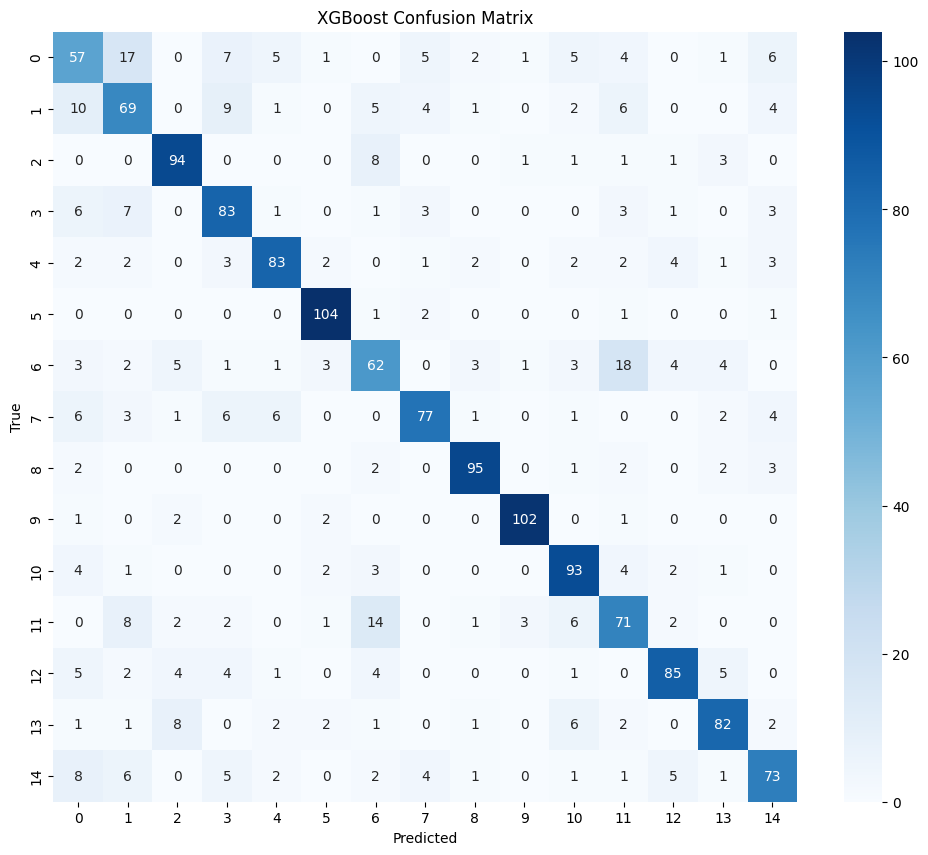

üìä Classification Report (XGBoost):
              precision    recall  f1-score   support

           0     0.5429    0.5135    0.5278       111
           1     0.5847    0.6216    0.6026       111
           2     0.8103    0.8624    0.8356       109
           3     0.6917    0.7685    0.7281       108
           4     0.8137    0.7757    0.7943       107
           5     0.8889    0.9541    0.9204       109
           6     0.6019    0.5636    0.5822       110
           7     0.8021    0.7196    0.7586       107
           8     0.8879    0.8879    0.8879       107
           9     0.9444    0.9444    0.9444       108
          10     0.7623    0.8455    0.8017       110
          11     0.6121    0.6455    0.6283       110
          12     0.8173    0.7658    0.7907       111
          13     0.8039    0.7593    0.7810       108
          14     0.7374    0.6697    0.7019       109

    accuracy                         0.7523      1635
   macro avg     0.7534    0.7531    0.752

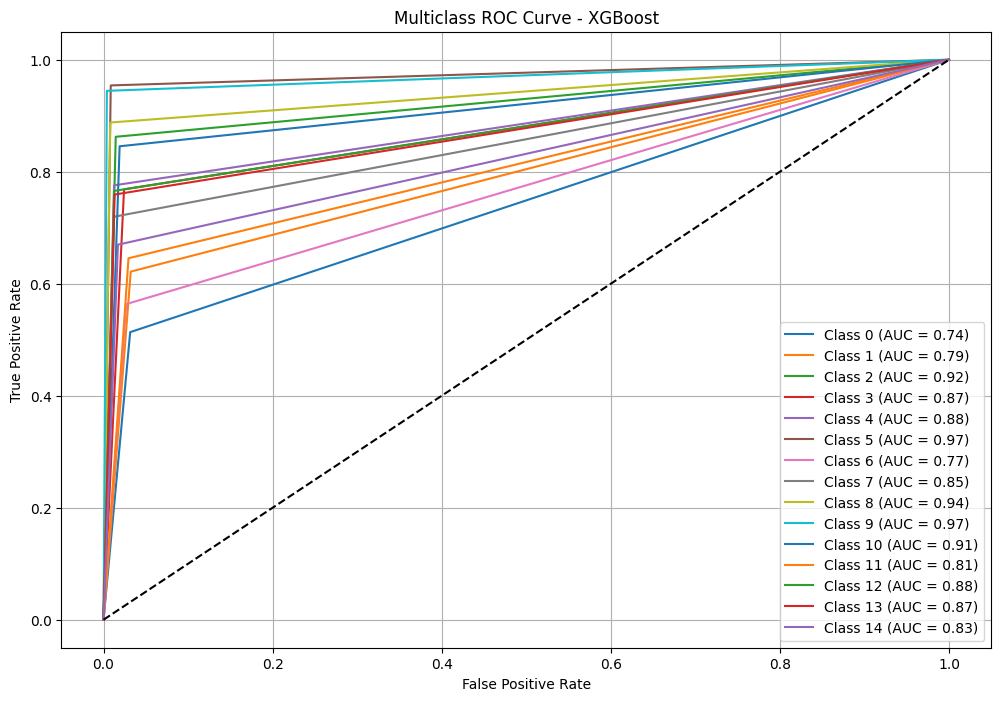


üìä Final Model Comparison:
           Model  Accuracy  Macro F1-score
0            KNN      0.71            0.72
1            SVM      0.73            0.74
2  Random Forest      0.71            0.71
3        XGBoost      0.75            0.75


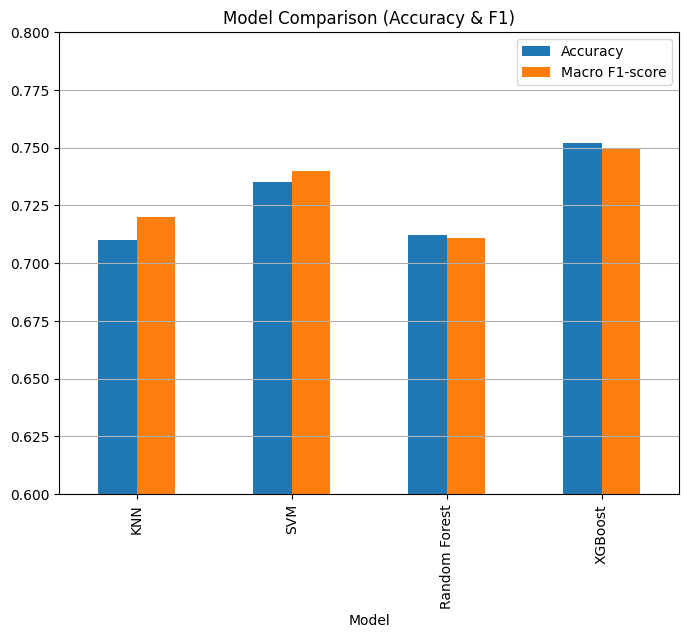

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize
import pandas as pd

# --- Required: load your test labels and predictions for XGBoost
# y_test = ...
# y_pred_xgb = ...

# === 1) Confusion Matrix with Annotations ===
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# === 2) Print all Classification Metrics ===
report = classification_report(y_test, y_pred_xgb, digits=4)
print("üìä Classification Report (XGBoost):")
print(report)

# === 3) ROC Curve for All Classes ===
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_bin = label_binarize(y_pred_xgb, classes=np.arange(n_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# === 4) Final Model Comparison Table ===
comparison_df = pd.DataFrame({
    "Model": ["KNN", "SVM", "Random Forest", "XGBoost"],
    "Accuracy": [0.710, 0.735, 0.712, 0.752],
    "Macro F1-score": [0.72, 0.74, 0.711, 0.75]
})

print("\nüìä Final Model Comparison:")
print(comparison_df)
comparison_df.plot(kind="bar", x="Model", figsize=(8,6), ylim=(0.6, 0.8), legend=True, title="Model Comparison (Accuracy & F1)")
plt.grid(axis='y')
plt.show()
